In [ ]:
import torchvision
import torch
from torchvision import transforms
image_path="./"
transform = transforms.Compose([transforms.ToTensor()])
mnist_dataset = torchvision.datasets.MNIST(root=image_path,train=True,transform=transform,download=True)
from torch.utils.data import Subset

mnist_valid_dataset = Subset(mnist_dataset,torch.arange(10000))
mnist_train_dataset = Subset(mnist_dataset, torch.arange(10000,len(mnist_dataset)))
mnist_test_dataset = torchvision.datasets.MNIST(root=image_path, train=False,transform=transform,download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 143410511.80it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 19741801.47it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 40829179.49it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 16755082.47it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [ ]:
from torch.utils.data import DataLoader
batch_size = 64
torch.manual_seed(1)
train_dl = DataLoader(mnist_train_dataset,batch_size,shuffle=True)
valid_dl = DataLoader(mnist_valid_dataset,batch_size, shuffle=True)

In [ ]:
import torch.nn as nn

In [ ]:
model = nn.Sequential()

model.add_module('conv1', nn.Conv2d(in_channels=1, out_channels=32,kernel_size=5,padding=2))
model.add_module("relu1", nn.ReLU())
model.add_module('pool1', nn.MaxPool2d(kernel_size=2))
model.add_module('conv2', nn.Conv2d(in_channels=32,out_channels=64,kernel_size=5,padding=2))
model.add_module("relu2", nn.ReLU())
model.add_module('pool2', nn.MaxPool2d(kernel_size=2))


In [ ]:
model.add_module('flatten', nn.Flatten())

In [ ]:
x = torch.ones((4,1,28,28))
model(x).shape

torch.Size([4, 3136])

In [ ]:
model.add_module('fc1', nn.Linear(3136,1024))
model.add_module('relu3', nn.ReLU())
model.add_module('dropout', nn.Dropout(p=0.5))
model.add_module('fc2', nn.Linear(1024,10))

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
def train(model, num_epochs, train_dl, valid_dl):
    loss_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs

    for epoch in range(num_epochs):
        model.train()
        loss_hist_train[epoch] = 0
        accuracy_hist_train[epoch] = 0

        for x_batch, y_batch in train_dl:
            pred = model(x_batch)
            loss = loss_fn(pred, y_batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            loss_hist_train[epoch] += loss.item() * y_batch.size(0)
            is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.sum()

        loss_hist_train[epoch] /= len(train_dl.dataset)
        accuracy_hist_train[epoch] /= len(train_dl.dataset)

        model.eval()
        loss_hist_valid[epoch] = 0
        accuracy_hist_valid[epoch] = 0

        with torch.no_grad():
            for x_batch, y_batch in valid_dl:
                pred = model(x_batch)
                loss = loss_fn(pred, y_batch)
                loss_hist_valid[epoch] += loss.item() * y_batch.size(0)
                is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
                accuracy_hist_valid[epoch] += is_correct.sum()

            loss_hist_valid[epoch] /= len(valid_dl.dataset)
            accuracy_hist_valid[epoch] /= len(valid_dl.dataset)

        print(f'Epoch {epoch+1} accuracy: {accuracy_hist_train[epoch]:.4f}'
              f' val accuracy: {accuracy_hist_valid[epoch]:.4f}')

    return loss_hist_train, loss_hist_valid, accuracy_hist_valid, accuracy_hist_train


In [ ]:
torch.manual_seed(1)
num_epochs = 20
hist = train(model, num_epochs, train_dl, valid_dl)

Epoch 1 accuracy: 0.9488 val accuracy: 0.9829
Epoch 2 accuracy: 0.9837 val accuracy: 0.9878
Epoch 3 accuracy: 0.9894 val accuracy: 0.9889
Epoch 4 accuracy: 0.9913 val accuracy: 0.9872
Epoch 5 accuracy: 0.9934 val accuracy: 0.9889
Epoch 6 accuracy: 0.9946 val accuracy: 0.9896
Epoch 7 accuracy: 0.9957 val accuracy: 0.9902
Epoch 8 accuracy: 0.9961 val accuracy: 0.9904
Epoch 9 accuracy: 0.9963 val accuracy: 0.9905
Epoch 10 accuracy: 0.9972 val accuracy: 0.9907
Epoch 11 accuracy: 0.9966 val accuracy: 0.9904
Epoch 12 accuracy: 0.9975 val accuracy: 0.9898
Epoch 13 accuracy: 0.9971 val accuracy: 0.9913
Epoch 14 accuracy: 0.9981 val accuracy: 0.9896
Epoch 15 accuracy: 0.9981 val accuracy: 0.9905
Epoch 16 accuracy: 0.9986 val accuracy: 0.9909
Epoch 17 accuracy: 0.9982 val accuracy: 0.9896
Epoch 18 accuracy: 0.9976 val accuracy: 0.9903
Epoch 19 accuracy: 0.9979 val accuracy: 0.9901
Epoch 20 accuracy: 0.9981 val accuracy: 0.9911


In [ ]:
print(model)

Sequential(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=3136, out_features=1024, bias=True)
  (relu3): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=1024, out_features=10, bias=True)
)


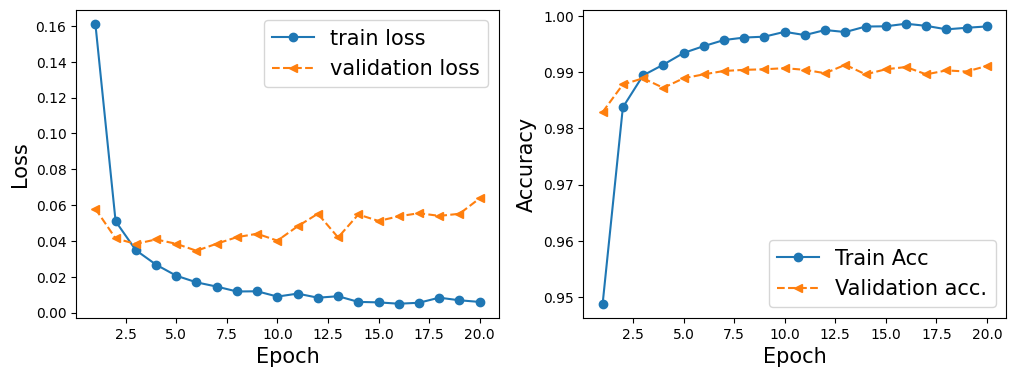

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x_arr = np.arange(len(hist[0]))+1
fig = plt.figure(figsize=(12,4))
ax  = fig.add_subplot(1,2,1)
ax.plot(x_arr,hist[0], '-o', label='train loss')
ax.plot(x_arr,hist[1],'--<', label='validation loss')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax=fig.add_subplot(1,2,2)
ax.plot(x_arr, hist[3], '-o', label='Train Acc')
ax.plot(x_arr,hist[2], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
plt.show()

In [ ]:
pred = model(mnist_test_dataset.data.unsqueeze(1)/255.)
is_correct = (torch.argmax(pred,dim=1) == mnist_test_dataset.targets).float()
print(f'Test Accuracy: {is_correct.mean():.4f}')


In [ ]:
fig = plt.figure(figsize=(12,4))
for i in range(25):
  ax = fig.add_subplot(5,7,i+1)
  ax.set_xticks([]); ax.set_yticks([])
  img = mnist_test_dataset[i][0][0,:,:]
  pred = model(img.unsqueeze(0).unsqueeze(1))
  y_pred = torch.argmax(pred)
  ax.imshow(img,cmap='gray_r')
  ax.text(0.9,0.1,y_pred.item(),size=15,color='blue',horizontalalignment='center',verticalalignment='center', transform= ax.transAxes)
plt.show()